# Campaigns' Data Analysis

This notebook presents detailed data analysis for 2 campaigns run simultaneously for the clients from 10th March to 31st March 2021. Both campaigns provided three services, namely - 
    
    1. Cooking
    2. Cleaning, and
    3. Ironing
    
from the client's portfolio. 

## Aim for the Task

Aim for this analysis is to understand user behaviour, answer asked questions and make recommendations for helping the campaign be more effective. 

Let us begin!

In [1]:
import pandas as pd
import numpy as np

In [2]:
pages = pd.read_csv('pages.csv')
events = pd.read_csv('events.csv')

In [3]:
pages.head(10)

,trackTime,userId,page
0,1.615350e+09,2acefd2c-8a82-4e1d-8aff-044522455633,Campaign 2 - Landing Page
1,1.615350e+09,2acefd2c-8a82-4e1d-8aff-044522455633,Ironing: Learn More Page
2,1.615351e+09,58691bae-d6ef-4f18-be62-fe071baddf0b,Campaign 1 - Landing Page
3,1.615351e+09,58691bae-d6ef-4f18-be62-fe071baddf0b,Cleaning: Booking First Page
4,1.615351e+09,58691bae-d6ef-4f18-be62-fe071baddf0b,Home Page
5,1.615351e+09,c9b60a17-c808-43ad-9bfc-c57ff6c11c55,Campaign 1 - Landing Page
6,1.615351e+09,c9b60a17-c808-43ad-9bfc-c57ff6c11c55,Cleaning: Booking First Page
7,1.615351e+09,58691bae-d6ef-4f18-be62-fe071baddf0b,Services Page
8,1.615351e+09,c9b60a17-c808-43ad-9bfc-c57ff6c11c55,Cleaning: Booking Second Page
9,1.615351e+09,58691bae-d6ef-4f18-be62-fe071baddf0b,Services Page


In [4]:
len(pages.index)

3373

In [5]:
pages.count()

trackTime    3334
userId       3371
page         3369
dtype: int64

In [6]:
pages[pages.trackTime.isnull()].userId.unique()

array(['d10ad9e0-e104-4d19-8254-04eba8cefc67',
       '6b628071-beaa-42e1-9b20-361ebbe76c77'], dtype=object)

In [7]:
events.head(10)

,trackTime,userId,event
0,1.615350e+12,2acefd2c-8a82-4e1d-8aff-044522455633,Learn More
1,1.615350e+12,58691bae-d6ef-4f18-be62-fe071baddf0b,Share in WhatsApp
2,1.615351e+12,58691bae-d6ef-4f18-be62-fe071baddf0b,Cleaning: Book Now
3,1.615351e+12,58691bae-d6ef-4f18-be62-fe071baddf0b,Menu: Home
4,1.615351e+12,58691bae-d6ef-4f18-be62-fe071baddf0b,Address Input
5,1.615351e+12,c9b60a17-c808-43ad-9bfc-c57ff6c11c55,Cleaning: Book Now
6,1.615351e+12,c9b60a17-c808-43ad-9bfc-c57ff6c11c55,Share in WhatsApp
7,1.615351e+12,58691bae-d6ef-4f18-be62-fe071baddf0b,Menu: Services
8,1.615351e+12,58691bae-d6ef-4f18-be62-fe071baddf0b,Address Input
9,1.615351e+12,c9b60a17-c808-43ad-9bfc-c57ff6c11c55,Select Region: Lahore


In [8]:
len(events.index)

3094

In [9]:
events.count()

trackTime    3045
userId       3093
event        3090
dtype: int64

In [10]:
events[events.trackTime.isnull()].userId.unique()

array(['d10ad9e0-e104-4d19-8254-04eba8cefc67',
       '6b628071-beaa-42e1-9b20-361ebbe76c77'], dtype=object)

In [11]:
print('Pages data types:\n', pages.dtypes, '\n\n', 'Events data types:\n', events.dtypes)

Pages data types:
 trackTime    float64
userId        object
page          object
dtype: object 

 Events data types:
 trackTime    float64
userId        object
event         object
dtype: object


## Question: Is there any need of data preprocessing? If yes, how and why you did it?

Yes, there is a need of data preprocessing for the given datasets. This need arises from the fact that some data is missing. I will handle missing data for each column separately for both pages and events.

    1. userId: Drop the rows where userId column is empty because if we do not have the user id no inference about the user can be made from that data point.
    2. page/event: Fill the missing place with a dummy value. 
    3. trackTime: Fill the missing place with the average value of the column because complete timestamps are missing for two user ids (this will be done after concatinating the datasets)

## Data Preprocessing

### Pages missing values handling

In [12]:
pages.dropna(subset = ['userId'], inplace=True)

In [13]:
pages['page'].fillna('Dummy page', inplace=True)

### Events missing values handling

In [14]:
events.dropna(subset = ['userId'], inplace=True)

In [15]:
events['event'].fillna('Dummy event', inplace=True)

### Concat datasets and handle missing timestamps

In [16]:
pages['category'] = 'page'
events['category'] = 'event'

In [17]:
pages.rename(columns={'page': 'action/step'}, inplace=True)

In [18]:
events.rename(columns={'event': 'action/step'}, inplace=True)

In [19]:
events.trackTime = events.trackTime/1000

In [20]:
data = pd.concat([pages, events], ignore_index=True)

In [21]:
data['trackTime'].fillna(np.mean(data.trackTime), inplace=True)

In [22]:
data.count()

trackTime      6464
userId         6464
action/step    6464
category       6464
dtype: int64

### Time conversion to UTC timestamp

Before moving forward, let's first add another column 'time' with UTC timestamp for better readability in both datasets.

In [23]:
from datetime import datetime

In [24]:
data['time'] = data.apply(lambda row: datetime.utcfromtimestamp(row.trackTime), axis=1)

In [25]:
data.head(10)

,trackTime,userId,action/step,category,time
0,1.615350e+09,2acefd2c-8a82-4e1d-8aff-044522455633,Campaign 2 - Landing Page,page,2021-03-10 04:17:25
1,1.615350e+09,2acefd2c-8a82-4e1d-8aff-044522455633,Ironing: Learn More Page,page,2021-03-10 04:17:30
2,1.615351e+09,58691bae-d6ef-4f18-be62-fe071baddf0b,Campaign 1 - Landing Page,page,2021-03-10 04:30:45
3,1.615351e+09,58691bae-d6ef-4f18-be62-fe071baddf0b,Cleaning: Booking First Page,page,2021-03-10 04:30:50
4,1.615351e+09,58691bae-d6ef-4f18-be62-fe071baddf0b,Home Page,page,2021-03-10 04:31:12
5,1.615351e+09,c9b60a17-c808-43ad-9bfc-c57ff6c11c55,Campaign 1 - Landing Page,page,2021-03-10 04:34:14
6,1.615351e+09,c9b60a17-c808-43ad-9bfc-c57ff6c11c55,Cleaning: Booking First Page,page,2021-03-10 04:34:19
7,1.615351e+09,58691bae-d6ef-4f18-be62-fe071baddf0b,Services Page,page,2021-03-10 04:34:45
8,1.615351e+09,c9b60a17-c808-43ad-9bfc-c57ff6c11c55,Cleaning: Booking Second Page,page,2021-03-10 04:35:05
9,1.615351e+09,58691bae-d6ef-4f18-be62-fe071baddf0b,Services Page,page,2021-03-10 04:35:08


In [26]:
np.min(data[data.category=='event'].time)

Timestamp('2021-03-10 04:17:29.023000')

In [27]:
np.max(data[data.category=='event'].time)

Timestamp('2021-03-31 10:16:15.885000')

## Question: Is there any data discrepancy? If yes, please explain the situation and what course of action did you take?

Yes, there is a data discrepancy. In the events.csv file trackTime column data has 12 digits each while pages.csv file trackTime column data has 9 digits each. While trying to convert the UNIX format of time to UTC timestamp, I got an error with events.csv file. Hence, I divided the trackTime data by 1000 to have only 9 significant digit before the decimal and checked the min and max time stamps after conversion. They lie in the given time frame of 10th March to 31st March 2021. Hence, we can use this data now.

# Data Analysis

In [28]:
data.sort_values(['userId', 'trackTime'], inplace=True)

In [29]:
data.reset_index(drop=True,inplace=True)

### Users per campaign

In [30]:
total_reach = data.userId.unique().shape[0]
print(total_reach)

1052


### Total reach of the campaigns combined: 1052 users

In [31]:
data['action/step'] = data['action/step'].astype(str)

## Campaign 1: 
### Reach - 379
### Impressions - 392
### Repeated Users - 13

In [32]:
index1 = [val.startswith('Campaign 1') for val in list(data['action/step'])]
camp1_reach = data.loc[index1].userId.unique().shape[0]
print(camp1_reach)

379


In [33]:
camp1_impressions = data.loc[index1].userId.shape[0]
print(camp1_impressions)

392


In [34]:
repeat_camp1_users = camp1_impressions - camp1_reach
print(repeat_camp1_users)

13


## Campaign 2: 
### Reach - 676
### Impressions - 720
### Repeated Users - 44

In [35]:
index2 = [val.startswith('Campaign 2') for val in list(data['action/step'])]
camp2_reach = data.loc[index2].userId.unique().shape[0]
print(camp2_reach)

676


In [36]:
camp2_impressions = data.loc[index2].userId.shape[0]
print(camp2_impressions)

720


In [37]:
repeat_camp2_users = camp2_impressions - camp2_reach
print(repeat_camp2_users)

44


### Total repeat users - 57

In [38]:
total_repeat = repeat_camp1_users + repeat_camp2_users
print(total_repeat)

57


### Visualization

In [39]:
import seaborn as sns
from matplotlib import pyplot as plt

In [40]:
sns.set()

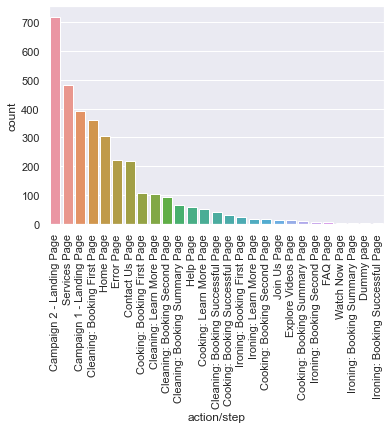

In [41]:
sns.countplot(x='action/step',
              data=data[data.category=='page'],
              order=data[data.category=='page']['action/step'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

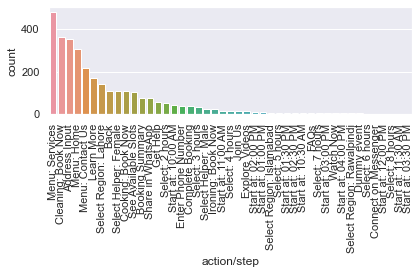

In [42]:
sns.countplot(x='action/step',
              data=data[data.category=='event'],
              order=data[data.category=='event']['action/step'].value_counts().index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

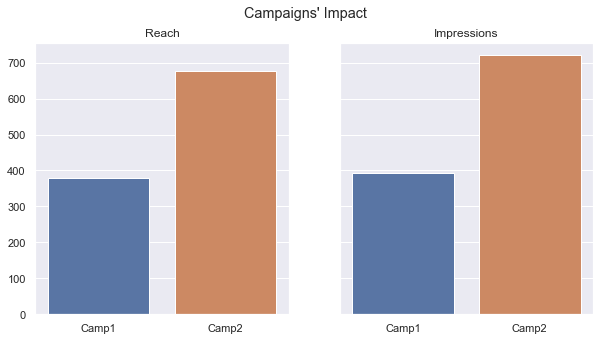

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('Campaigns\' Impact')


sns.barplot(x=['Camp1', 'Camp2'], y=[camp1_reach, camp2_reach],ax=axes[0])
axes[0].set_title('Reach')

sns.barplot(x=['Camp1', 'Camp2'], y=[camp1_impressions, camp2_impressions],ax=axes[1])
axes[1].set_title('Impressions')

plt.show()

In [44]:
fig.savefig('campaign_impact.png')

## Completed Bookings

### Cleaning bookings

In [45]:
cleaning_bookings = len(data[data['action/step'] == 'Cleaning: Booking Successful Page'])
print(cleaning_bookings)

41


### Cooking bookings

In [46]:
cooking_bookings = len(data[data['action/step'] == 'Cooking: Booking Successful Page'])
print(cooking_bookings)

29


### Ironing bookings

In [47]:
ironing_bookings = len(data[data['action/step'] == 'Ironing: Booking Successful Page'])
print(ironing_bookings)

3


### Total Bookings

In [48]:
Total_Bookings = cleaning_bookings + cooking_bookings + ironing_bookings
print(Total_Bookings)

73


In [49]:
num_of_bookings_per_user = Total_Bookings/total_reach 
print('percentage - bookings per user: ', num_of_bookings_per_user*100)

percentage - bookings per user:  6.939163498098859


### Visualization

In [50]:
bookings = {'type': ['cleaning', 'cooking', 'ironing'],
            'number of bookings': [cleaning_bookings, cooking_bookings, ironing_bookings]}
dt = pd.DataFrame(bookings)
dt.set_index('type', inplace=True)

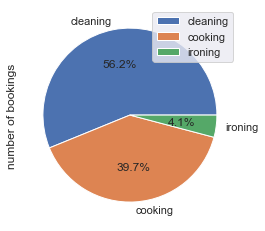

In [51]:
plot = dt.plot.pie(autopct="%.1f%%", y='number of bookings')
plt.show()

In [52]:
fig = plot.get_figure()
fig.savefig('bookings.png')

## Question: What 3 most common action/step most users dropped at?

In [53]:
data['userId'] = data['userId'].astype(str)

In [54]:
data['group'] = data['userId'].ne(data['userId'].shift()).cumsum()
data

,trackTime,userId,action/step,category,time,group
0,1.616662e+09,00199b58-2875-47a6-bcc6-eeb30e7575a2,Campaign 1 - Landing Page,page,2021-03-25 08:49:29.000,1
1,1.616150e+09,015395a0-0401-462b-9eee-47a6c0af549a,Campaign 2 - Landing Page,page,2021-03-19 10:40:43.000,2
2,1.616150e+09,015395a0-0401-462b-9eee-47a6c0af549a,Cleaning: Book Now,event,2021-03-19 10:40:51.163,2
3,1.616150e+09,015395a0-0401-462b-9eee-47a6c0af549a,Cleaning: Booking First Page,page,2021-03-19 10:40:52.000,2
4,1.616150e+09,015395a0-0401-462b-9eee-47a6c0af549a,Menu: Services,event,2021-03-19 10:41:05.291,2
...,...,...,...,...,...,...
6459,1.615986e+09,ff727b75-9aff-43e2-864c-c513025456a7,Start at: 02:00 PM,event,2021-03-17 13:02:05.911,1052
6460,1.615986e+09,ff727b75-9aff-43e2-864c-c513025456a7,Start at: 03:00 PM,event,2021-03-17 13:02:06.376,1052
6461,1.615986e+09,ff727b75-9aff-43e2-864c-c513025456a7,Start at: 10:00 AM,event,2021-03-17 13:02:09.575,1052
6462,1.615986e+09,ff727b75-9aff-43e2-864c-c513025456a7,Booking Summary,event,2021-03-17 13:02:25.624,1052


In [55]:
dfs = data.groupby('group')

In [56]:
counts = dict()
sub_counts1 = dict()
sub_counts2 = dict()
sub_counts3 = dict()
for _, df in dfs:
    
    l = len(df.index)
    key = df['action/step'].iloc[l-1]
    if key not in counts.keys():
        counts[key] = 1
    else:
        counts[key] += 1
        if key == 'Error Page':
            sub_key = df['action/step'].iloc[l-2]
            if sub_key not in sub_counts1.keys():
                sub_counts1[sub_key] = 1
            else:
                sub_counts1[sub_key] += 1
        if key == 'Services Page':
            sub_key = df['action/step'].iloc[l-2]
            if sub_key not in sub_counts2.keys():
                sub_counts2[sub_key] = 1
            else:
                sub_counts2[sub_key] += 1
        if key == 'Home Page':
            sub_key = df['action/step'].iloc[l-2]
            if sub_key not in sub_counts3.keys():
                sub_counts3[sub_key] = 1
            else:
                sub_counts3[sub_key] += 1

In [57]:
{k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}

{'Error Page': 203,
 'Campaign 2 - Landing Page': 189,
 'Campaign 1 - Landing Page': 132,
 'Services Page': 80,
 'Home Page': 72,
 'Cleaning: Learn More Page': 52,
 'Contact Us Page': 37,
 'Cleaning: Booking First Page': 37,
 'Help Page': 35,
 'Cooking: Learn More Page': 33,
 'Share in WhatsApp': 30,
 'Back': 28,
 'Select Region: Lahore': 17,
 'Address Input': 15,
 'Cleaning: Booking Successful Page': 11,
 'Ironing: Learn More Page': 10,
 'Cooking: Booking First Page': 10,
 'Cleaning: Booking Summary Page': 9,
 'Select Helper: Female': 8,
 'Select Helper: Male': 6,
 'Select: 2 hours': 5,
 'Enter Phone Number': 5,
 'FAQ Page': 3,
 'Join Us Page': 3,
 'Select: 3 hours': 3,
 'Ironing: Booking First Page': 3,
 'Cooking: Booking Summary Page': 2,
 'Ironing: Booking Successful Page': 2,
 'Watch Now Page': 2,
 'Explore Videos Page': 2,
 'Select: 5 hours': 1,
 'Cleaning: Booking Second Page': 1,
 'Start at: 10:00 AM': 1,
 'Menu: Home': 1,
 'Select Region: Islamabad': 1,
 'Booking Summary': 1,


### Answer: Most users dropped because they got an error page during their journey on the platform. We can ingnore the landing pages drops because probably those users were checking out what the campaings are offering. Services page and Home page drops are next in line.

In [58]:
{k: v for k, v in sorted(sub_counts1.items(), key=lambda item: item[1], reverse=True)}

{'Campaign 2 - Landing Page': 150, 'Campaign 1 - Landing Page': 52}

In [59]:
{k: v for k, v in sorted(sub_counts2.items(), key=lambda item: item[1], reverse=True)}

{'Menu: Services': 78, 'Home Page': 1}

In [60]:
{k: v for k, v in sorted(sub_counts3.items(), key=lambda item: item[1], reverse=True)}

{'Menu: Home': 71}

## Question: What is the total time spent by the users on the platform? What is the average time spent by each user? On which campaign users spent more time?

In [61]:
total_time = 0
camp1 = 0
camp2 = 0
for _, df in dfs:
    l = len(df.index)
    if l != 1:
        diff = df['time'].iloc[l-1] - df['time'].iloc[0]
        
        ind1 = sum([val1.startswith('Campaign 1') for val1 in list(df['action/step'])])
        ind2 = sum([val2.startswith('Campaign 2') for val2 in list(df['action/step'])])
    
        if ind1 != 0 and ind2 == 0:
            camp1 = camp1 + diff.total_seconds()
            total_time += diff.total_seconds()
        elif ind2 != 0 and ind1 == 0:
            camp2 = camp2 + diff.total_seconds()
            total_time += diff.total_seconds()
        else:
            print(ind1, ind2)

1 1
1 1
2 1
1 1
0 0


In [62]:
total_time = total_time/60/60
total_time

21.475154999999987

In [63]:
total_time*60/(total_reach-5)

1.230667908309455

In [64]:
camp1 = camp1/60/60
camp1

6.519143055555556

In [65]:
camp2 = camp2/60/60
camp2

14.956011944444441

#### Total time spent on the platform: 21 hrs 30 mins 

#### Time spent on campaign 1: 6 hrs 30 mins

#### Time spent on campaign 2: 15 hrs

### Users spent more time on Campaign 2. Average time spent by each user is 1 min 14 seconds

# Recommendations 

Based on the data analysis, I have following recommendations:

1. Campaign 2 is more successful. If a choice needs to be made for where to put in more resources then, I would recommend to focus more on this campaign. Users spent double the time on this campaign as compared to the other one.
2. Most users dropped because they saw an error page just after landing on campaigns. Probably an investigation is needed on technical side regarding why an error page occurs after a user lands on any campaign.
3. Menu bar to 'Home' and 'Services' should be removed. Many of the users are dropping off the platform after going to these. Probably they are not able to find their way back to the bookings pages.